# Finding minimum polynomial approximation for $\exp$ on the interval $[-1, 0]$

by minimzing
$$
    J = J(c_0, \ldots, c_{n-1}) = \int_{-1}^{0} \left[ \exp(x) - \sum_{k=0}^{n-1} c_k x^ k \right]^2 dx
$$

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n = 7
c = sp.symbols(f"c_0:{n}")
x = sp.symbols('x')

min_poly = sum(coeff * x ** k for k, coeff in enumerate(c))

J = sp.integrate((sp.exp(x) - min_poly)**2, (x, -1, 0)).simplify()

optimal_solution = sp.solve([
    sp.Eq(J.diff(coeff), 0) for coeff in c
])

min_poly = sp.lambdify(x, min_poly.subs(optimal_solution), 'numpy')

J.subs(optimal_solution).evalf()

8.32660731291501e-17

compare the minimal polynomial and exact result 

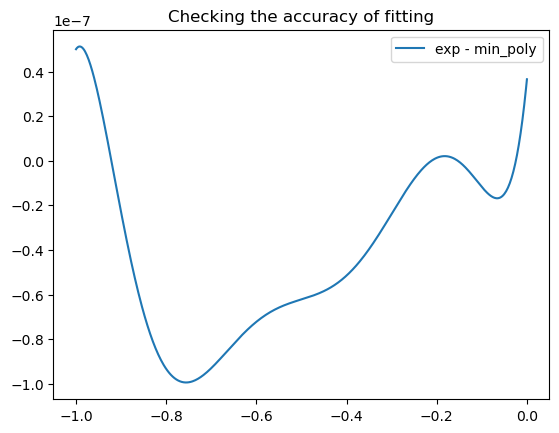

In [3]:
xi = np.linspace(-1, 0, 500) 

plt.title("Checking the accuracy of fitting")
plt.plot(xi, np.exp(xi) - min_poly(xi), label="exp - min_poly")
plt.legend()
plt.show()

Generating the code for the list of coefficients

In [4]:
[sp.simplify(optimal_solution[_]) for _ in c]

[4996033 - 13580623*exp(-1),
 212036664 - 576375408*exp(-1),
 2137326660 - 5809856220*exp(-1),
 8603087640 - 23385616800*exp(-1),
 16212644910 - 44070538050*exp(-1),
 14326743816 - 38944127376*exp(-1),
 4792295508 - 13026809796*exp(-1)]